# 第5回 | CSV・Excelファイルの読み込み

今回の講義は、Pandasを使ってCSVやExcelを読み込む方法を紹介します。

<br>

前回までの講義で、Pandas.DataFrameを一から作成する方法を紹介していました。

作成方法としては3つほどあり、その中でもパターン③をオススメしたかと思います。

- パターン① : 二次元リストから作成
- パターン② : 辞書から作成
- **パターン③ : 辞書を格納したリストから作成**

<br>

ただ実務のデータ分析では、DataFrameを一から作成するよりも、CSVやExcelファイルを読み込む機会が多いです。(特にCSV)

Pythonを使ってデータ分析するとき、必ずと言っていいほど使う文法なのでしっかりおさえていきましょう！

## ライブラリのインポート

今回Excelファイルを読み込むにあたり、Excelファイルを操作するためのライブラリ`openpyxl`が必要になります。

というわけなので、まずはライブラリをインストールしましょう。

In [ ]:
# openpyxlをインストールする


インストールが完了したら、ライブラリをインストールします。

いつもどおりですが`Pandas`と`Numpy`ですね。

In [ ]:
# ライブラリのインポート


## DataFrameを見やすくする関数を設定

今回はCSVとExcelの読み込み結果を比較していきます。

そのため、DataFrameを横並びで表示するための関数を設定しておきましょう。

In [ ]:
from IPython.display import HTML

def pprint(*args):
    template = '<div style="float: left; padding: 5px;">{}</div>'
    
    return HTML(
        ''.join(template.format(arg._repr_html_()) for arg in args)
    )

DataFrameを表示するとき、この関数を使うことで横並び(水平)の状態で表示できるようになります。

詳しいことは、実際にDataFrameを読み込んだときに解説していきますね。

<br>

ここまでの準備が整ったら、さっそく内容に入っていきましょう。

# PandasでCSV/Excelを読み込む方法

今回の講義では、以下の3パターンを学べるCSV・Excelファイルを準備しました。

- パターン① : 純粋にCSVやExcelを読み込む
- パターン② : ヘッダーを指定してCSVやExcelを読み込む
- パターン③ : 型を指定してCSVやExcelを読み込む

まずは純粋にCSV・Excelファイルを読み込む方法を紹介します。

そのあとで、色々なオプションを付けてCSV・Excelファイルを読み込んでいきたいと思います。

<br>

この講義で使うCSV・Excelファイルは、`utils`フォルダに格納されています。

In [ ]:
!tree ../utils/

`src`フォルダに入っている`create_dataframe.ipynb`というNotebookでCSVとExcelを作成しています。

細かく解説はしませんが勉強になると思うので、良かったらあとで確認してみてください。

<br>

本題のCSV・Excelファイルは、`utils/data/`に格納されています。

CSVが2つとExcelが2つの、計4ファイルです。

<br>

ファイル内には、以下のようなデータが格納されています。

<br>

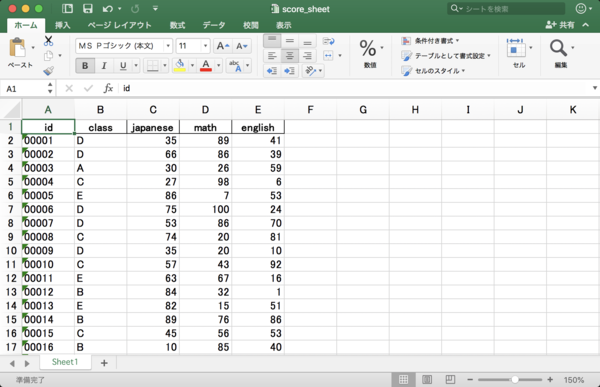

<br>

学内で実施した国数英のテスト結果が格納されているイメージです。

学年にはA〜Eまでの5クラスあって、idが各個人の番号ということになります。

<br>

このようなデータを使っていきたいので、先にフォルダのパスを設定しておきましょう。

In [ ]:
# CSVとExcelファイルが入っているPATHを変数data_dirに格納する


これでCSV・Excelファイルを読み込む準備が完了しました。

それでは、さっそくパターン①から始めていきましょう！

## パターン① : 純粋にCSVやExcelを読み込む

まずはシンプルにCSVやExcelを読み込む方法です。

結論、CSVを読み込むなら`pd.read_csv()`を、Excelを読み込むなら`pd.read_excel()`を使います。

実際に読み込みたいファイルを指定するときは、カッコの中身にファイルパスを書いてあげます。

<br>

ここでは`score_sheet.csv`と`score_sheet.xlsx`を読み込んでみましょう。

In [ ]:
# CSVとExcelファイルを読み込んで、変数csv_df、excel_dfに格納する


これだけでCSVとExcelファイルの読み込みが完了しました。

`pd.read_**()`を使うと、読み込んだデータはPandas.DataFrameの形になります。

<br>

それでは、CSVとExcelの読み込み結果を確認してみましょう。

今までは中身を確認するときDataFrameをそのまま書いて実行していましたが、今回は`pprint()`を使って横並びで表示してみましょう。

In [ ]:
# pprint()を使って、DataFrameを横並びで表示する


コードを実行してみると、しっかり読み込んだデータがPandas.DataFrameになっていますね。

とりあえず、シンプルなファイル読み込みができるようになりました！

## パターン② : ヘッダーを指定してCSVやExcelを読み込む

パターン①では、`score_sheet.**`を使ってファイル読み込みを学習しました。

ただ、今回の講義では別のCSV・Excelファイル`score_sheet_non_header.**`も準備されています。

In [ ]:
!tree ../utils/

というわけで、もう一方のデータを先ほどの方法で読み込んでみましょう。

In [ ]:
# CSVとExcelファイルを読み込んで、変数csv_df2、excel_df2に格納する


ファイル名を変更するだけで良いので、特に問題ないかと思います。

それでは、関数`pprint()`を使って中身を確認してみましょう。

In [ ]:
# pprint()を使って、DataFrameを横並びで表示する


中身を確認してみると、先ほどのデータとは少し違う気がします。

比較のために、`csv_df`と`csv_df2`を横並びで表示してみましょう。

In [ ]:
# pprint()を使って、DataFrameを横並びで表示する


このように比較してみると、いま読み込んだデータはヘッダー情報が一行ずれていることが分かります。

そのため、100行だったデータが101行になっているわけですね。

<br>

読み込みたいデータによっては、今回のヘッダーがズレていることがあります。

そんなとき、ヘッダーを指定してデータを読み込むには、`pd.read_**()`の引数に`header=ヘッダーのインデックス番号`を書いてあげます。

In [ ]:
# ヘッダーを指定して、CSVとExcelファイルを読み込む


今回はヘッダーが一行ズレてインデックス番号が1になっているので、`header=1`を指定するわけですね。

これでデータの読み込みがうまくできたか確認してみましょう。例のごとく、`pprint()`を使って読み込んだデータを表示します。

In [ ]:
# pprint()を使って、DataFrameを横並びで表示する


出力結果を確認してみると、うまく読み込みできたようですね！

元々ヘッダー情報が正しく設定されていたデータ`csv_df`と比較してみましょう。

<br>

そのためには`pprint()`を使って横並びでDataFrameを表示してあげます。

In [ ]:
# pprint()を使って、DataFrameを横並びで表示する


出力結果を見た感じ、しっかりヘッダー問題を解決できていますね！

## パターン③ : 型を指定してCSVやExcelを読み込む

ここまで2パターンのファイル読み込み方法を紹介しました。

- パターン① : 純粋にCSVやExcelを読み込む
- パターン② : ヘッダーを指定してCSVやExcelを読み込む


でも、これらの読み込み方法には少し問題点がありました。どこに問題があったのかと言うと、idの読み込みでゼロ落ちしている点です。


元のCSV・Excelファイルを見てみると、idのカラムには00001のように、先頭がゼロ埋めされています。

<br>

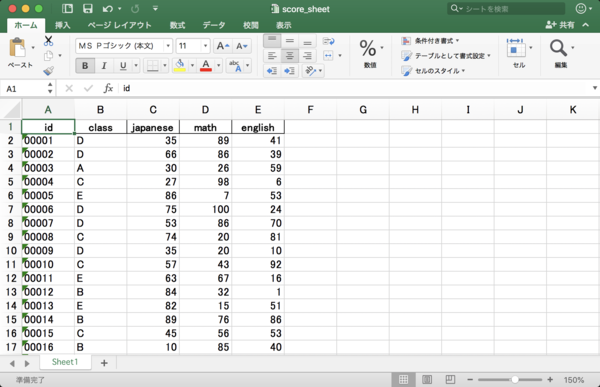

<br>

これが`pd.read_**()`を使ってファイル読み込みすることで、ゼロ落ちしていたわけです。

なぜこのような結果になるのかというと、それはPandas側で自動的にidカラムをint型に変換してくれていたからです。

言い方を悪くすると、余計なことをしてくれたわけですね（笑）

<br>

基本的に、IDなどのユニークで振られたものは、ゼロ埋めされた状態で読み込むのが鉄則です。

つまり、**int型に変換せずにstr型のまま読み込むのがベター**ということになります。

<br>

`pd.read_**()`を使うときに型を指定して読み込むには、引数で`dtype`を渡してあげます。


具体的には、Pythonの辞書型で`{'id': str}`のように書いてあげます。

In [ ]:
# 型を指定して、CSVとExcelファイルを読み込む


このように書くことで、idカラムが数値型ではなく文字型で読み込めます。

それでは本当に文字型で読み込めているか確認したいので、いつもどおりDataFrameを出力してみましょう。

In [ ]:
# pprint()を使って、DataFrameを横並びで表示する


しっかりゼロ落ちしない形でデータを読み込めましたね。

今回はidカラムだけデータ形式を変更しましたが「データ全体を文字型に変換して読み込む」といったことも可能です。

<br>

そのためには、各カラムごとに辞書を作成するのではなく、`dtype=str`と書くことで一括処理できます。

In [ ]:
# 全体でstrを指定して、CSVとExcelファイルを読み込む


In [ ]:
# pprint()を使って、DataFrameを横並びで表示する


idカラム以外は特に見た目が変わっていませんが、中身のデータ形式はすべて`str`になっています。

*※もちろんDataFrameに格納されているデータ形式を確認する方法はあり、それは次回の講義で紹介していきます！*

<br>


というわけで、型を指定した状態でCSVやExcelを読み込めるようになりました！

## 補足

今回の講義では、`pd.read_**()`の引数でheaderやdtypeを紹介しました。

実は他にも色々な引数があります。そこで、今回紹介した2つほど使用頻度は高くないですが、次に使う機会の多い引数をサラッと紹介しておきます。

- usecols : 読み込むカラムをインデックス番号で設定
- nrows : 読み込む行数を設定
- encoding : 文字コードを設定

<br>

すべてのカラムを使う必要がないとき、引数`usecols`にインデックス番号を格納したリストを渡せば、読み込むカラムを指定できます。

例えば、idカラムとjapaneseカラムを使いたいときは、以下のように引数`usecols`を指定します。

In [ ]:
# use_colsを指定してDataFrameを読み込む


また、列だけでなく行も指定したい場合、引数`nrows`に読み込みたい行数を指定します。

In [ ]:
# use_colsとnrowsを指定してDataFrameを読み込む


最後の引数`encoding`は、`usecols`や`nrows`より使用頻度が高いです。

引数`encoding`を使うと、データを読み込むとき文字コードを指定できます。

<br>

`pd.read_csv()`や`pd.read_excel()`でファイルを読み込むとき、デフォルトの文字コードはUTF-8です。

なので、読み込みたいファイルがUTF-8でなければ、対応する文字コードを引数`encoding`に渡してあげます。

<br>

例えば、読み込みたいExcelファイルの文字コードがShift-JISであれば、`encoding='shift-jis'`と設定してあげれば良いわけですね。

# まとめ


というわけで、今回はPandasでCSVやExcelを読み込む方法を紹介してきました。

今回の内容をおさえておけば、データの読み込みで苦戦することはなくなるはずです。

<br>

次回の講義では、**DataFrameの中身を確認する6つの文法**を紹介していきます。

今回データを読み込むとき、すべてのカラムを文字型に指定しましたが、idカラム以外が本当に変換できているのか分からない状態でした。

<br>

次回はそんなときに役立つPandas操作を学習していくことになります。

基礎だけどよく使うものを紹介するので、しっかり習得していきましょう！

<hr>

また、講義の感想をメンションつけてツイートしていただけると嬉しいです！

Twitter : はやたす([@hayatasuuu](https://twitter.com/hayatasuuu) )